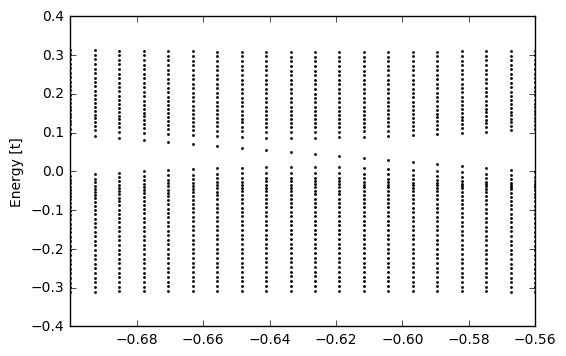

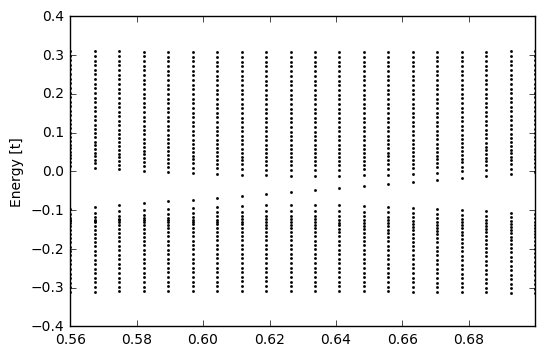

In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D, pSweep_1D, spectrum_plot_1D, FermiVelocityZQL

import numpy as np
from numpy import pi
from copy import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt

#Some global and default parameters
SitesCount_XDefault = 500
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_XDefault)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, FermiEnergy = 0., \
                     betaz=1.2, b0=0.1, pzNode2 = -0.6314028, \
                     Rescale_hop0 = 1.0, Rescale_onsite0 = 1.0, Rescale_onsite1 = 1.0, \
                     EnergyNode2 = 0.049189807,
                     lBinv2=0., x_shift= (SitesCount_XDefault - 1.)/2., \
                     EigenvectorsCount = 50, EnergyPrecision = 10**(-5), WavefunctionComponents = 4, \
                     py = 0., pz = 0. )


param = copy(ParametersDefault)
param.x_shift= (500 - 1.)/2.
fsys_1D = diagonalizer.FinalizedSystem_1D(500)

param.Eigenvectorscount = 10
param.py = 0.

param.lBinv2 = 1./75.**2



evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, -0.7, -0.56, pCount=20, yORzSweep = 'pzSweep')
diagonalizer.spectrum_plot_1D(evals, -0.7, -0.56, pCount=20)

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, 0.56, 0.7, pCount=20, yORzSweep = 'pzSweep')
diagonalizer.spectrum_plot_1D(evals, 0.56, 0.7, pCount=20)

In [2]:
param.pz = param.pzNode2
param.py = 0
evals, evecs = diagonalize_1D(fsys_1D, param)
print([Energy for Energy in evals if Energy >= 0.])

[0.01147352227236784, 0.049175458278322787, 0.086886376587366768, 0.10253590931686546, 0.11468024582888048, 0.12531878740105817, 0.13546330051791955, 0.14569125843936528, 0.15623143326273758, 0.16710347844275508, 0.17825389615242318, 0.18962178614891442, 0.20115704474065468, 0.21282165038772705, 0.22458718435662148, 0.23643226411251131, 0.24834057605758128, 0.26029947416005988, 0.2722989973264493, 0.28433117771232197, 0.29638954837823644, 0.30846878803816469]


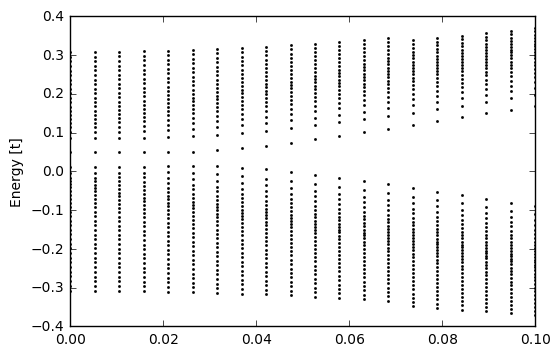

In [3]:
param.pz = param.pzNode2
evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, 0., 0.1, pCount=20, yORzSweep = 'pySweep')
diagonalizer.spectrum_plot_1D(evals, 0., 0.1, pCount=20)

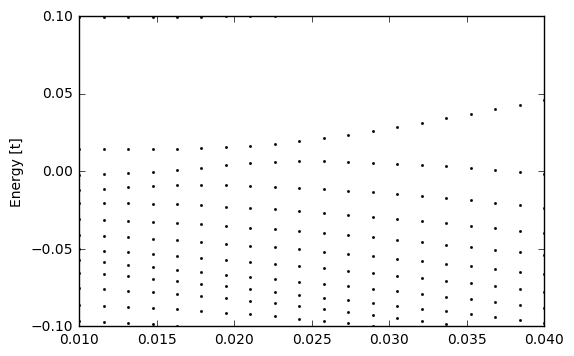

In [4]:
param.pz = param.pzNode2 + 0.05
pyMin = 0.01
pyMax = 0.04
evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pyMin, pyMax, pCount=20, yORzSweep = 'pySweep')

plt = diagonalizer.spectrum_plot_1D(evals, pyMin, pyMax, pCount=20, ShowPlot = False)
axes = plt.gca()
axes.set_ylim([-0.1,0.1])
plt.show()